<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Project/SDS/SDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1 align="center">Analysis of Amazon Book Reviews  &#128218;**

<h2 align="center">Prepared by:</h2>
<li align="center">Goo Ye Jui [A20EC0191]</li>
<li align="center">Ong Han Wah [A20EC0129]</li>
<li align="center">Maizatul Afrina Safiah binti Saiful Azwan [A20EC0204]</li>

<br>

---


<h2 align="center">Dataset Description</h2>
<p align="center">The dataset was obtained from <a href="https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews">Kaggle</a> titled Amazon Book Reviews.This dataset contain the feedback about 3M user on 212404 unique books. It contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014 and this file has these attributes.</p>

<table align="center">
  <tr>
    <th>Columns</th>
    <th>Description</th>
  </tr>
  <tr>
    <th>Id</th>
    <th>The Id of the book</th>
  </tr>
  <tr>
    <th>Title</th>
    <th>The title of the book</th>
  </tr>
  <tr>
    <th>Price</th>
    <th>The price of the book</th>
  </tr>
  <tr>
    <th>User_id</th>
    <th>Id of the user</th>
  </tr>
  <tr>
    <th>profileName</th>
    <th>Name of the user</th>
  </tr>
  <tr>
    <th>review/helpfulness</th>
    <th>Helpfulness rating</th>
  </tr>
  <tr>
    <th>review/score</th>
    <th>Book's rating</th>
  </tr>
  <tr>
    <th>review/time</th>
    <th>Time given for review</th>
  </tr>
  <tr>
    <th>review/summary</th>
    <th>Review summary</th>
  </tr>
  <tr>
    <th>review/text</th>
    <th>Full text review</th>
  </tr>
</table>

<br></br>
This project will be analyse by using 3 different libraries which are **Pandas**, **Polars** and **Koalas**. This is to find out which library has the highest efficiency among them as well as to find answers for our inquiries.

# Downloading the Dataset

1. Downloading the datasets.


*   Since the size of our dataset is larger than 1GB, we first upload the csv files to Google Drive. Then, we use below codes to download the datasets from the Google Drive to Google Colab
*   The same codes were used to download the second dataset.





In [ ]:
# Pull dataset from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1D4OR2U9aXTL5OMjMQ_lDRzA3KP19XjKK/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Books_rating.csv') 

In [ ]:
# Pull dataset from google drive
link = 'https://drive.google.com/file/d/1oZSQs2VtTEmT-h0WA12GKmhcCOwzUUat/view?usp=sharing'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('books_data.csv') 

2. Install related libraries

In [ ]:
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 45.6 MB/s eta 0:00:00


In [ ]:
!pip install koalas
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 7.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=1333a23c7e572c8e1f10c715510c2b28ee1b269909ebaf07a61ec139c46e1bfa
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


3. Import related libraries

In [ ]:
#Import libraries
import pandas as pd, numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession
import polars as pl
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# **Data Preparation and Cleaning**

Data preparation involves cleaning and transforming the data to ensure quality results in the analysis. Dataset is read before any cleaning operations. In this project, the data preparation and cleaning operation includes: **joining dataframe, selecting columns, drop duplicates, drop nulls, sampling, and cleaning strings.**

### Read Dataset

Use `read_csv()` to read the dataset into dataframe and use `head()` to display the first 5 rows of data. Two datasets are loaded which are `Books_rating.csv` and `books_data.csv`.

#### Pandas

In [ ]:
%%time
df_rate = pd.read_csv('Books_rating.csv')

CPU times: user 29.4 s, sys: 2.44 s, total: 31.9 s
Wall time: 38.4 s


In [ ]:
%%time
df_rate.head()

CPU times: user 1.7 ms, sys: 0 ns, total: 1.7 ms
Wall time: 1.72 ms


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
%%time
df_data = pd.read_csv('books_data.csv')
df_data.head()

CPU times: user 3.51 s, sys: 196 ms, total: 3.7 s
Wall time: 4.9 s


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


#### Polars

In [ ]:
%%time 
pl_rate = pl.read_csv('Books_rating.csv')

CPU times: user 10.6 s, sys: 5.53 s, total: 16.1 s
Wall time: 12.5 s


In [ ]:
%%time
pl_rate.head()

CPU times: user 104 µs, sys: 113 µs, total: 217 µs
Wall time: 3.31 ms


Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
str,str,f64,str,str,str,f64,i64,str,str
"""1882931173""","""Its Only Art I...",null,"""AVCGYZL8FQQTD""","""Jim of Oz ""jim...","""7/7""",4.0,940636800,"""Nice collectio...","""This is only f..."
"""0826414346""","""Dr. Seuss: Ame...",null,"""A30TK6U7DNS82R...","""Kevin Killian""","""10/10""",5.0,1095724800,"""Really Enjoyed...","""I don't care m..."
"""0826414346""","""Dr. Seuss: Ame...",null,"""A3UH4UZ4RSVO82...","""John Granger""","""10/11""",5.0,1078790400,"""Essential for ...","""If people beco..."
"""0826414346""","""Dr. Seuss: Ame...",null,"""A2MVUWT453QH61...","""Roy E. Perry ""...","""7/7""",4.0,1090713600,"""Phlip Nel give...","""Theodore Seuss..."
"""0826414346""","""Dr. Seuss: Ame...",null,"""A22X4XUPKF66MR...","""D. H. Richards...","""3/3""",4.0,1107993600,"""Good academic ...","""Philip Nel - D..."


In [ ]:
%%time
pl_data = pl.read_csv('books_data.csv')

CPU times: user 577 ms, sys: 273 ms, total: 850 ms
Wall time: 856 ms


In [ ]:
%%time
pl_data.head()

CPU times: user 23 µs, sys: 11 µs, total: 34 µs
Wall time: 36 µs


Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
str,str,str,str,str,str,str,str,str,f64
"""Its Only Art I...",null,"""['Julie Strain...","""http://books.g...","""http://books.g...",null,"""1996""","""http://books.g...","""['Comics & Gra...",null
"""Dr. Seuss: Ame...","""Philip Nel tak...","""['Philip Nel']...","""http://books.g...","""http://books.g...","""A&C Black""","""2005-01-01""","""http://books.g...","""['Biography & ...",null
"""Wonderful Wors...","""This resource ...","""['David R. Ray...","""http://books.g...","""http://books.g...",null,"""2000""","""http://books.g...","""['Religion']""",null
"""Whispers of th...","""Julia Thomas f...","""['Veronica Had...","""http://books.g...","""http://books.g...","""iUniverse""","""2005-02""","""http://books.g...","""['Fiction']""",null
"""Nation Dance: ...",null,"""['Edward Long'...",null,"""http://books.g...",null,"""2003-03-01""","""http://books.g...",null,null


#### Koalas

In [ ]:
%%time 
ks_rate = ks.read_csv('Books_rating.csv')

CPU times: user 368 ms, sys: 125 ms, total: 493 ms
Wall time: 52.8 s


In [ ]:
%%time
ks_rate.head()

CPU times: user 45.1 ms, sys: 4.22 ms, total: 49.3 ms
Wall time: 393 ms


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,None,AVCGYZL8FQQTD,"""Jim of Oz """"jim-of-oz""""""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,None,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,None,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"""If people become the books they read and if ""..."
3,0826414346,Dr. Seuss: American Icon,None,A2MVUWT453QH61,"""Roy E. Perry """"amateur philosopher""""""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,None,A22X4XUPKF66MR,"""D. H. Richards """"ninthwavestore""""""",3/3,4.0,1107993600,Good academic overview,"""Philip Nel - Dr. Seuss: American IconThis is ..."


In [ ]:
%%time
ks_data = ks.read_csv('books_data.csv')
ks_data.head()

CPU times: user 138 ms, sys: 28.4 ms, total: 167 ms
Wall time: 10.5 s


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,None,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,None,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],None
1,Dr. Seuss: American Icon,"""Philip Nel takes a fascinating look into the ...",like that of Lewis Carroll and Edward Lear,has changed language itself,"giving us new words like """"nerd."""" And Seuss'...",inspiring artists like filmmaker Tim Burton a...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,None,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],None
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],None
4,"Nation Dance: Religion, Identity and Cultural ...",None,['Edward Long'],None,http://books.google.nl/books?id=399SPgAACAAJ&d...,None,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,None,None


<h4> From these 3 libraries this is the ranking for 'read csv' from the fastest to the slowest:


1.   Polars (12.5 s)
2.   Pandas (38.4 s)
3.   Koalas (52.8 s)

> Polars took 12.5s meanwhile Koalas took 52.8s to read 'Books_rating.csv' 
</h4>


### Join Dataframe

Then, the two loaded datasets are join/merge on the `Title` key into a new dataframe. Pandas and Koalas use the same method which is `merge()` while Polars use `join()`.

#### Pandas

In [ ]:
%%time
book = pd.merge(df_rate,df_data, on = 'Title')

CPU times: user 2.67 s, sys: 24.1 ms, total: 2.69 s
Wall time: 2.68 s


In [ ]:
book.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


#### Polars

In [ ]:
%%time
pl_book = pl_rate.join(pl_data, on = 'Title')

CPU times: user 4.08 s, sys: 8.05 s, total: 12.1 s
Wall time: 6.93 s


In [ ]:
pl_book.head()

CPU times: user 728 µs, sys: 0 ns, total: 728 µs
Wall time: 7.98 ms


Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
str,str,f64,str,str,str,f64,i64,str,str,str,str,str,str,str,str,str,str,f64
"""1882931173""","""Its Only Art I...",null,"""AVCGYZL8FQQTD""","""Jim of Oz ""jim...","""7/7""",4.0,940636800,"""Nice collectio...","""This is only f...",null,"""['Julie Strain...","""http://books.g...","""http://books.g...",null,"""1996""","""http://books.g...","""['Comics & Gra...",null
"""0826414346""","""Dr. Seuss: Ame...",null,"""A30TK6U7DNS82R...","""Kevin Killian""","""10/10""",5.0,1095724800,"""Really Enjoyed...","""I don't care m...","""Philip Nel tak...","""['Philip Nel']...","""http://books.g...","""http://books.g...","""A&C Black""","""2005-01-01""","""http://books.g...","""['Biography & ...",null
"""0826414346""","""Dr. Seuss: Ame...",null,"""A3UH4UZ4RSVO82...","""John Granger""","""10/11""",5.0,1078790400,"""Essential for ...","""If people beco...","""Philip Nel tak...","""['Philip Nel']...","""http://books.g...","""http://books.g...","""A&C Black""","""2005-01-01""","""http://books.g...","""['Biography & ...",null
"""0826414346""","""Dr. Seuss: Ame...",null,"""A2MVUWT453QH61...","""Roy E. Perry ""...","""7/7""",4.0,1090713600,"""Phlip Nel give...","""Theodore Seuss...","""Philip Nel tak...","""['Philip Nel']...","""http://books.g...","""http://books.g...","""A&C Black""","""2005-01-01""","""http://books.g...","""['Biography & ...",null
"""0826414346""","""Dr. Seuss: Ame...",null,"""A22X4XUPKF66MR...","""D. H. Richards...","""3/3""",4.0,1107993600,"""Good academic ...","""Philip Nel - D...","""Philip Nel tak...","""['Philip Nel']...","""http://books.g...","""http://books.g...","""A&C Black""","""2005-01-01""","""http://books.g...","""['Biography & ...",null


#### Koalas

In [ ]:
%%time
ks_book = ks_rate.merge(ks_data, on = 'Title')

CPU times: user 149 ms, sys: 34.7 ms, total: 184 ms
Wall time: 1.08 s


In [ ]:
ks_book.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,B0007H2HAM,"""""""Always ready!"""": The story of the United St...",""",,A3AUL23GMCOP2A,Andrew S. Rogers,1/1,2.0,115...",stout hearts,"and alert minds""""""","""It's hard to believe that any history of the ...",it's the narrative ability of its author,"Kensil Bell.By the time """"Always Ready!"""" was...",Bell had already written a couple of novels a...,1941) which was not only an Academy novel -- ...,""",,['Kensil Bell'],http://books.google.com/boo...",&dq=%22Always+ready!%22:+The+story+of+the+Unit...,"&hl=&cd=1&source=gbs_api""",None,1943,http://books.google.com/books?id=ElUEAAAAMAAJ&...,None,None,None
1,0804467900,"""""""Carefree"""" (R.K.O.Classic Screenplays)""",None,A15LK8DSFQZZ52,"""Patricia R. Andersen """"redheaded booklover""""""",0/0,5.0,1045526400,"Fred and Ginger, I remember you",This book is the screenplay for Ginger Rogers ...,None,"['Allan Scott', 'Ernest Pagano']",None,http://books.google.com/books?id=GtHkuQEACAAJ&...,None,1985,http://books.google.com/books?id=GtHkuQEACAAJ&...,None,None
2,B00085T7O2,"""""""Catch 'em alive Jack"""";: The life and adven...",""",,ASEH0CVYVGZCZ,""dagmara """"dagmara""""""",0/1,5.0,1341705600,Fascinating life and historical facts,There are many ideas what life was like in the...,None,None,""",""Best known for catching wolves alive with h...",John R. Abernathy (1876?1941) was born to Sco...,Abernathy considered himself a true son of th...,sheriff,Secret Service agent,and wildcat oil driller. But it was the accid...,he could stun the creature long enough to cap...,a service for which he was paid fifty dollars...,['John R. Abernathy']
3,B00085T7O2,"""""""Catch 'em alive Jack"""";: The life and adven...",""",,A91QQ7IYBAK2Q,Ken Marcus,0/1,4.0,1313971200...","terrible forward by Jon T. Coleman""",I found the book to be interesting and engagin...,None,None,None,None,None,""",""Best known for catching wolves alive with h...",John R. Abernathy (1876?1941) was born to Sco...,Abernathy considered himself a true son of th...,sheriff,Secret Service agent,and wildcat oil driller. But it was the accid...,he could stun the creature long enough to cap...,a service for which he was paid fifty dollars...,['John R. Abernathy']
4,1891598015,"""""""Glory is a-comin' soon"""": A history of Morm...",None,AKNICOEAMLIE,Dave,1/1,3.0,1079827200,Historical overview of LDS church in Indiana a...,I received my copy from the Kokomo-Howard Coun...,None,['Martha Peterson Taysom'],None,http://books.google.nl/books?id=j_M_AAAACAAJ&d...,None,1998-01-01,http://books.google.nl/books?id=j_M_AAAACAAJ&d...,['Indiana'],None


<h4> From these 3 libraries this is the ranking for 'join' from the fastest to the slowest:


1.   Koalas (1.08 s)
2.   Pandas (2.68 s)
3.   Polars (6.93 s)

> Koalas took 1.08s meanwhile Polars took 6.93s to read to join both 'Books_rating.csv' and 'books_data.csv' into a single dataframe 
</h4>

### Dataframe Info

We call `info()` and `shape` on the merged dataframe to get the dataframe's information. Polars does not have a `info()` method but it has `schema` which return the column name and datatype.

#### Pandas

In [ ]:
%%time
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000000 entries, 0 to 2999999
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
 10  description         object 
 11  authors             object 
 12  image               object 
 13  previewLink         object 
 14  publisher           object 
 15  publishedDate       object 
 16  infoLink            object 
 17  categories          object 
 18  ratingsCount        float64
dtypes: float64(3), int64(1), object(15)
memory usage: 457.8+ MB
CPU times: user 11.2 ms, sys: 1.04 ms, total: 12.2 ms
Wall time: 21.3 ms


In [ ]:
%%time
book.shape

CPU times: user 24 µs, sys: 5 µs, total: 29 µs
Wall time: 33.9 µs


(3000000, 19)

#### Polars

In [ ]:
%%time
pl_book.schema

CPU times: user 1.41 ms, sys: 388 µs, total: 1.8 ms
Wall time: 13.4 ms


{'Id': Utf8,
 'Title': Utf8,
 'Price': Float64,
 'User_id': Utf8,
 'profileName': Utf8,
 'review/helpfulness': Utf8,
 'review/score': Float64,
 'review/time': Int64,
 'review/summary': Utf8,
 'review/text': Utf8,
 'description': Utf8,
 'authors': Utf8,
 'image': Utf8,
 'previewLink': Utf8,
 'publisher': Utf8,
 'publishedDate': Utf8,
 'infoLink': Utf8,
 'categories': Utf8,
 'ratingsCount': Float64}

In [ ]:
%%time
pl_book.shape

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 19.1 µs


(3000000, 19)

#### Koalas

In [ ]:
%%time
ks_book.info()

<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 2999829 entries, 0 to 2999828
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Id                  2999829 non-null  object
 1   Title               2999829 non-null  object
 2   Price               482451 non-null   object
 3   User_id             2437589 non-null  object
 4   profileName         2437640 non-null  object
 5   review/helpfulness  2999461 non-null  object
 6   review/score        2999699 non-null  object
 7   review/time         2999802 non-null  object
 8   review/summary      2999764 non-null  object
 9   review/text         2999786 non-null  object
 10  description         2360322 non-null  object
 11  authors             2610460 non-null  object
 12  image               2469164 non-null  object
 13  previewLink         2667924 non-null  object
 14  publisher           2249757 non-null  object
 15  publishedDate       264204

In [ ]:
%%time
ks_book.shape

CPU times: user 149 ms, sys: 17.1 ms, total: 166 ms
Wall time: 25.3 s


(2999829, 19)

<h4> From these 3 libraries this is the ranking for 'info' from the fastest to the slowest:


1.   Polars (13.4 ms)
2.   Pandas (21.3 ms)
3.   Koalas (2min 15s)

> Polars took 13.4ms meanwhile Pandas and Koalas took 21.3ms and 2min 15s respectively to display overall info about dataframe 
</h4>

### Select Columns

We only want to use a subset of the dataframe for further analysis. So, we select the columns we want by passing the list of column names within the selection brackets `[]` and save the result into the same dataframe to save the memory usage. This method can be used on all three libraries but the same result can be achieved by Polars using `select()` method.

#### Pandas

In [ ]:
%%time
book = book[['Id','Title','User_id','profileName','review/helpfulness','review/score','review/summary','review/text','authors','categories','publisher','ratingsCount']]

CPU times: user 1.39 s, sys: 8.53 ms, total: 1.4 s
Wall time: 1.4 s


#### Polars

In [ ]:
%%time
pl_book = pl_book.select(
    pl.col(['Id','Title','User_id','profileName','review/helpfulness','review/score','review/summary','review/text','authors','categories','publisher','ratingsCount'])
)

CPU times: user 1.39 ms, sys: 1.66 ms, total: 3.04 ms
Wall time: 35.8 ms


#### Koalas

In [ ]:
%%time
ks_book = ks_book[['Id','Title','User_id','profileName','review/helpfulness','review/score','review/summary','review/text','authors','categories','publisher','ratingsCount']]

CPU times: user 22.5 ms, sys: 6.67 ms, total: 29.2 ms
Wall time: 456 ms


<h4> From these 3 libraries this is the ranking for 'select columns' from the fastest to the slowest:


1.   Polars (35.8 ms)
2.   Koalas (456 ms)
3.   Pandas (1.4 s)

> Polars took 35.8ms meanwhile Koalas and Pandas took 456ms and 1.4s respectively to select columns. 
</h4>

### Drop Duplicates

Drop duplicated rows by using `drop_duplicates()` for Pandas and Koalas while `unique()` for Polars.

#### Pandas

In [ ]:
%%time
book.drop_duplicates(inplace = True)

CPU times: user 11.6 s, sys: 69 ms, total: 11.7 s
Wall time: 11.6 s


In [ ]:
book.shape

(2990014, 12)

#### Polars

In [ ]:
%%time
pl_book = pl_book.unique()

CPU times: user 3.25 s, sys: 2.68 s, total: 5.94 s
Wall time: 4.28 s


In [ ]:
pl_book.shape

(2990014, 12)

#### Koalas

In [ ]:
%%time
ks_book.drop_duplicates(inplace = True)

CPU times: user 69.8 ms, sys: 10.5 ms, total: 80.4 ms
Wall time: 535 ms


In [ ]:
ks_book.shape

(2989485, 12)

<h4> From these 3 libraries this is the ranking for 'drop duplicates' from the fastest to the slowest:


1.   Koalas (535 ms)
2.   Polars (4.28 s)
3.   Pandas (11.6 s)

> Koalas took 535ms meanwhile Polars and Pandas took 4.28s and 11.6s respectively to drop duplicate rows from the dataframe. 
</h4>

### Count Null

Pandas and Koalas use `isna().sum()` while Polars use `null_count()` to get the number of missing values for each columns.

#### Pandas

In [ ]:
%%time
book.isna().sum()

CPU times: user 1.92 s, sys: 3.11 ms, total: 1.92 s
Wall time: 1.92 s


Id                          0
Title                     208
User_id                558434
profileName            558533
review/helpfulness          0
review/score                0
review/summary             38
review/text                 8
authors                389279
categories             549380
publisher              779914
ratingsCount          1356700
dtype: int64

#### Polars

In [ ]:
%%time
pl_book.null_count()

CPU times: user 63 µs, sys: 72 µs, total: 135 µs
Wall time: 212 µs


Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text,authors,categories,publisher,ratingsCount
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,208,558434,558533,0,0,38,8,389279,549380,779914,1356700


#### Koalas

In [ ]:
%%time
ks_book.isna().sum()

CPU times: user 633 ms, sys: 76.7 ms, total: 710 ms
Wall time: 1min 5s


Id                          0
Title                       0
User_id                558864
profileName            558810
review/helpfulness        365
review/score              128
review/summary             65
review/text                43
authors                387970
categories             527202
publisher              747370
ratingsCount          1237682
dtype: int64

<h4> From these 3 libraries this is the ranking for 'count null' from the fastest to the slowest:


1.   Polars (212 µs)
2.   Pandas (1.92 s)
3.   Koalas (1min 5s)

> Polars took 212 µs meanwhile Pandas and Koalas took 1.92s and 1min 5s respectively to count missing values from each columns.
</h4>

### Drop Null

Use `dropna()` and `drop_nulls()` to remove all rows that contain missing values in the dataframe.

#### Pandas

In [ ]:
%%time
book.dropna(inplace = True)

CPU times: user 2.4 s, sys: 11.3 ms, total: 2.41 s
Wall time: 2.4 s


In [ ]:
book.isna().sum()

Id                    0
Title                 0
User_id               0
profileName           0
review/helpfulness    0
review/score          0
review/summary        0
review/text           0
authors               0
categories            0
publisher             0
ratingsCount          0
dtype: int64

#### Polars

In [ ]:
%%time
pl_book = pl_book.drop_nulls()

CPU times: user 782 ms, sys: 1.53 s, total: 2.32 s
Wall time: 1.65 s


In [ ]:
pl_book.null_count()

Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text,authors,categories,publisher,ratingsCount
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0


#### Koalas

In [ ]:
%%time
ks_book.dropna(inplace = True)

CPU times: user 215 ms, sys: 23.1 ms, total: 238 ms
Wall time: 1.24 s


In [ ]:
ks_book.isna().sum()

Id                    0
Title                 0
User_id               0
profileName           0
review/helpfulness    0
review/score          0
review/summary        0
review/text           0
authors               0
categories            0
publisher             0
ratingsCount          0
dtype: int64

<h4> From these 3 libraries this is the ranking for 'drop null' from the fastest to the slowest:


1.   Koalas (1.24 s)
2.   Polars (1.65 s)
3.   Pandas (2.4 s)

> Koalas took 1.24s meanwhile Polars and Pandas took 1.65s and 2.4s respectively to drop all rows that contain missing values.
</h4>

### Sampling

After that, we do sampling to select a fraction of data by using `sample()` method. It helps to reduce memory usage and processing time. Pandas and Polars allow us to pass the number of rows `n` to be generated in the sample. However, specifying the number of rows in Koalas is not supported at the time of writing. Instead, we specify the fraction to get similar number of rows.

#### Pandas

In [ ]:
%%time
books = book.sample(100000)

CPU times: user 170 ms, sys: 866 µs, total: 171 ms
Wall time: 171 ms


In [ ]:
books.shape

(100000, 12)

#### Polars

In [ ]:
%%time
pl_book = pl_book.sample(n=100000)

CPU times: user 327 ms, sys: 171 ms, total: 498 ms
Wall time: 307 ms


#### Koalas

In [ ]:
ks_book.shape

(1253930, 12)

In [ ]:
%%time
ks_book = ks_book.sample(frac=0.08,random_state=1)

CPU times: user 41.1 ms, sys: 3.23 ms, total: 44.4 ms
Wall time: 320 ms


In [ ]:
ks_book.shape

(100348, 12)

<h4> From these 3 libraries this is the ranking for 'sample' from the fastest to the slowest:


1.   Pandas (171 ms)
2.   Polars (307 ms)
3.   Koalas (320 ms)

> Pandas took 171ms meanwhile Polars and Koalas took 307ms and 320ms respectively to process the data for sampling.
</h4>

### Clean String and Transform Data

#### Pandas

In [ ]:
# Removes bractes and colons from authors name
books['authors'] = books['authors'].str.extract(r'\'(.*)\'')
# Removes bractes and colons from categories
books['categories'] = books['categories'].str.extract(r'\'(.*)\'')
# Counting the length of the each review
books['word_count'] = books['review/text'].apply(lambda x: len(x.split(' ')))

books.head()

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text,authors,categories,publisher,ratingsCount,word_count
931194,0143058223,Shepherds Abiding,A30YW5IGP6SNZK,"Sharon Knutson ""chinamomma""",61/61,4.0,Faith abides in Mitford,I picked up the newest installment in the Mitf...,Jan Karon,Fiction,Penguin,20.0,166
328963,0874778336,The Meditative Mind: The Varieties of Meditati...,A1F1J5U9H72CV2,K. S. Dennis,8/8,5.0,Excellent introduction to meditation,This is an excellent introduction to meditatio...,Daniel Goleman,Meditation,Tarcher,1.0,312
165481,0192834118,The Idiot (Oxford World's Classics),A151XCH6MEQC23,Dawn L Steadman,2/3,5.0,Dostoevsky at his best,Dostoevsky is brilliant in this fascinating po...,Fyodor Dostoyevsky,Fiction,"Oxford University Press, USA",2.0,157
1198342,B000JC6MMO,Whispers,AFSCNBKETGT5Q,Felicia,0/0,5.0,Whispers,"The book opens with Hilary Thomas, a screenwri...",Dean R. Koontz,Fiction,Penguin,19.0,99
1969366,B000K0DB8I,Left Behind - A Novel Of The Earth's Last Days,A21Z8FUB9IZI2L,not4prophet,25/30,1.0,How did this ever become a bestseller?,"""Left Behind"""" is an attempt to blend religiou...","Tim F. LaHaye', 'Jerry B. Jenkins",FICTION,"Tyndale House Publishers, Inc.",3829.0,576


In [ ]:
books['review/score'] = pd.to_numeric(books['review/score'], errors='coerce')

#### Polars

In [ ]:
# Polars can create or assign multiple columns in one statement using with_columns method
pl_book = pl_book.with_columns([pl.col('authors').str.extract(r"'(.*)'"),
                                pl.col('categories').str.extract(r"'(.*)'"),
                                pl.col('review/text').apply(lambda x: len(x.split(' '))).alias('word count')])
pl_book.head()

Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text,authors,categories,publisher,ratingsCount,word count
str,str,str,str,str,f64,str,str,str,str,str,f64,i64
"""0736903623""","""How to Study Y...","""AYNU3EOHZK6RE""","""bornwthenewred...","""0/0""",5.0,"""try these book...","""they are loade...","""Kay Arthur', '...","""Juvenile Nonfi...","""Harvest House ...",62.0,22
"""B000PGNIAS""","""Gerald's Game""","""A1WFJI0SKDE1HG...","""Rachel""","""0/3""",5.0,"""One of best by...","""This was a ver...","""Stephen King""","""Fiction""","""Simon and Schu...",42.0,70
"""B000JMKVF8""","""Blood and Thun...","""A1UM7QBNGNKO93...","""Hank Rokosz ""A...","""2/3""",5.0,"""A Great Read.""","""Don't miss thi...","""Hampton Sides""","""History""","""Anchor""",28.0,29
"""0802841899""","""The Church of ...","""A2H2LORTA5EZY2...","""Edward E. Howe...","""3/5""",4.0,"""Christ is Lord...","""This is a very...","""Everett Fergus...","""Religion""","""Wm. B. Eerdman...",5.0,25
"""1857236262""","""Inversions""","""AS6SH2JM2YY3H""","""R Schmidt""","""0/0""",4.0,"""The Doctor sen...","""The scale of I...","""BRIAN BALTHAZO...","""Music""","""Mel Bay Public...",1.0,252


#### Koalas

In [ ]:
# Removes bractes and colons from authors name
ks_book['authors'] = ks_book['authors'].str.strip('[]\W+')
# Removes bractes and colons from categories
ks_book['categories'] = ks_book['categories'].str.strip('[]\W+')
# Counting the length of the each review
ks_book['word_count'] = ks_book['review/text'].apply(lambda x: len(x.split(' ')))

ks_book.head()

/usr/local/lib/python3.8/dist-packages/pyspark/sql/pandas/functions.py:394: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pyspark/sql/pandas/functions.py:394: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


,Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text,authors,categories,publisher,ratingsCount,word_count
2421808,0001047655,The Prodigal Daughter,A1CWKF5ITOLL30,"""""""sleah""""""",36/39,5.0,Make your daughters read this book,I was first given a copy of The Prodigal Daugh...,'Jeffrey Archer','Fiction',St. Martin's Paperbacks,27.0,111
2421823,0001047655,The Prodigal Daughter,A2C8IVS3AEH96R,Avid Reader,0/0,1.0,Disappointing,Loved Kane & Abel & was looking forward to rea...,'Jeffrey Archer','Fiction',St. Martin's Paperbacks,27.0,137
2421802,0001047655,The Prodigal Daughter,A2GXSX4YFKGQO5,Hendrik D'Amico,0/0,4.0,The Prodical Daughter,Splendid. Masterful story teller that takes yo...,'Jeffrey Archer','Fiction',St. Martin's Paperbacks,27.0,24
2421865,0001047655,The Prodigal Daughter,APCJMFWPHRR9A,"""Luv2read """"Luv2read""""""",0/0,4.0,interesting sequel,"""Oddly, I read this on my kindle and now it is...",'Jeffrey Archer','Fiction',St. Martin's Paperbacks,27.0,52
2747595,0001048228,Pale Battalions,ABZOQXWF4ACAK,Susanna King,0/1,4.0,Good historical mystery,I enjoyed following the different characters t...,'Robert Goddard','Fiction',Delta,6.0,33


# Exploratory Analysis and Visualization (Question & Answer)


In [ ]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.0 MB/s eta 0:00:00


In [ ]:
from kaleido.scopes.plotly import PlotlyScope
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

###**Question 1: Which category has the most numbers of books? List the Top 3 categories.**

#### Pandas

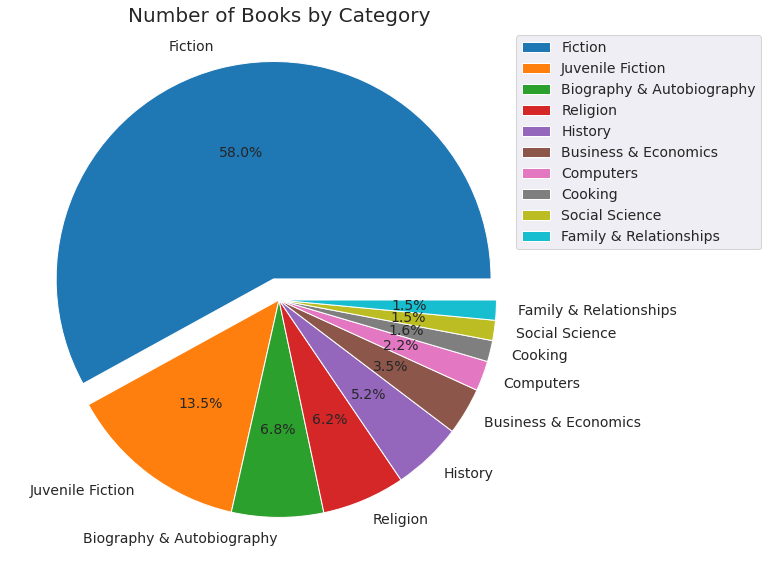

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(books['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%')
plt.title('Number of Books by Category', fontsize = 20)
plt.axis('off')
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper right')
plt.show()

#### Polars

In [ ]:
pl1 = pl_book.groupby("categories").agg([pl.count("categories").alias("count")]).sort('count',reverse=True).head(10)

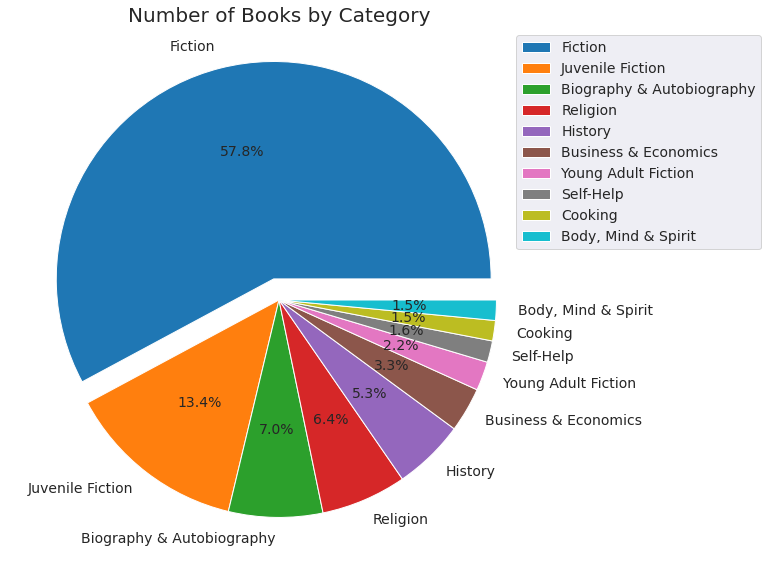

In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(pl1['count'],explode=(0.1,0,0,0,0,0,0,0,0,0), labels=pl1['categories'],autopct='%1.1f%%')
plt.title('Number of Books by Category', fontsize = 20)
plt.axis('off')
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper right')
plt.show()

#### Koalas

In [ ]:
ks_book['categories'].value_counts().head(10).plot.pie()

> According to the pie charts that have been analysed by using 3 libraries, the category that has the highest amount of book is **Fiction**, and the second highest is **Juvenile Fiction** followed by Biography & Autobiography, Religion, History, Business & Economics and others.

### **Question 2: Which author has written the most amount of book?**

#### Pandas

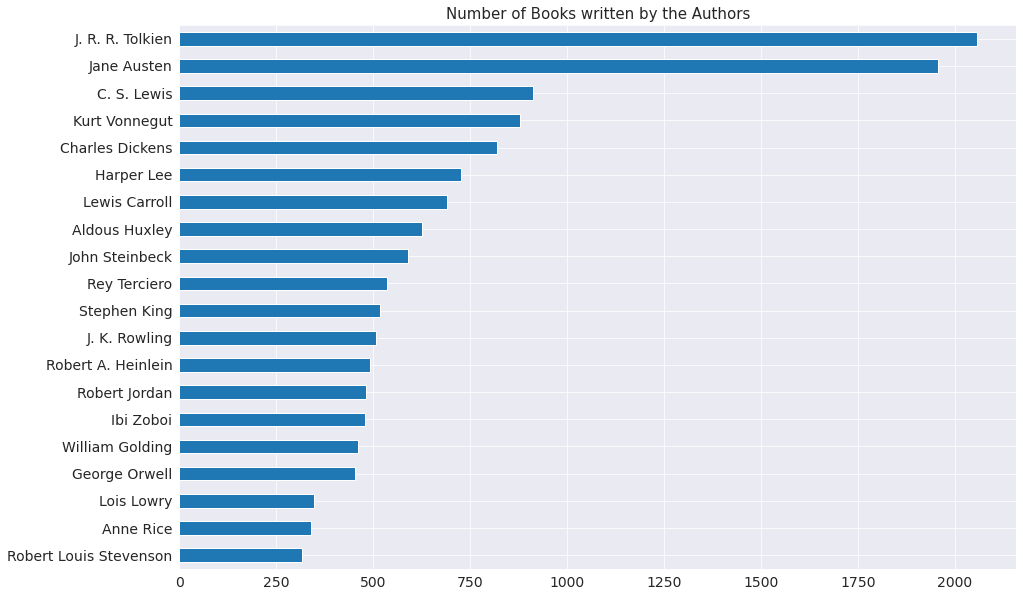

In [ ]:
books['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(15,10))
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.grid(visible=True, which='both')
plt.show()

#### Polars

In [ ]:
pl2 = pl_book.groupby("authors").agg([pl.count("authors").alias("count")]).drop_nulls().sort('count',reverse=True).head(20)

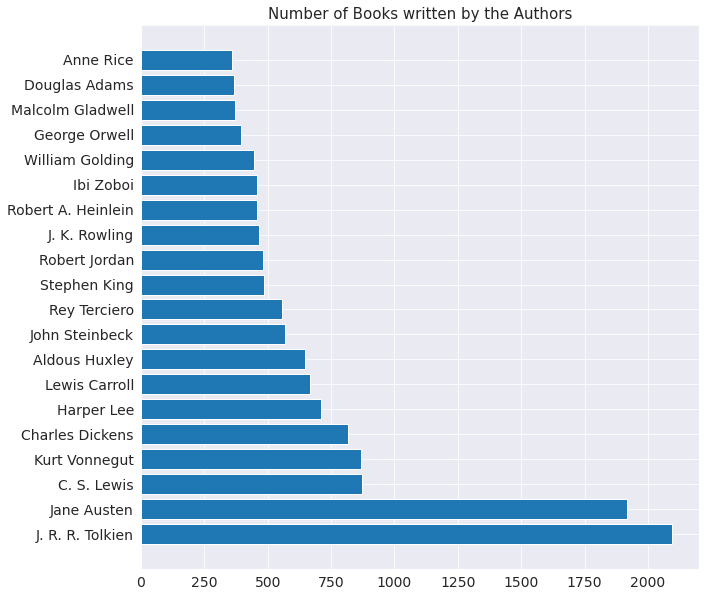

In [ ]:
plt.barh(pl2['authors'], pl2['count'])
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.grid(visible=True, which='both')
plt.show()

#### Koalas

In [ ]:
ks_book['authors'].value_counts().head(20).plot.barh()

> According to the bar charts that have been analysed by using 3 libraries, the authors that has written the highest amount of books is **J.R.R. Tolkien** and the second highest **Jane Austen** followed by Kurt Vonnegut, C. S. Lewis and others.

### **Question 3: Which publisher has published the most amount of book?**

#### Pandas

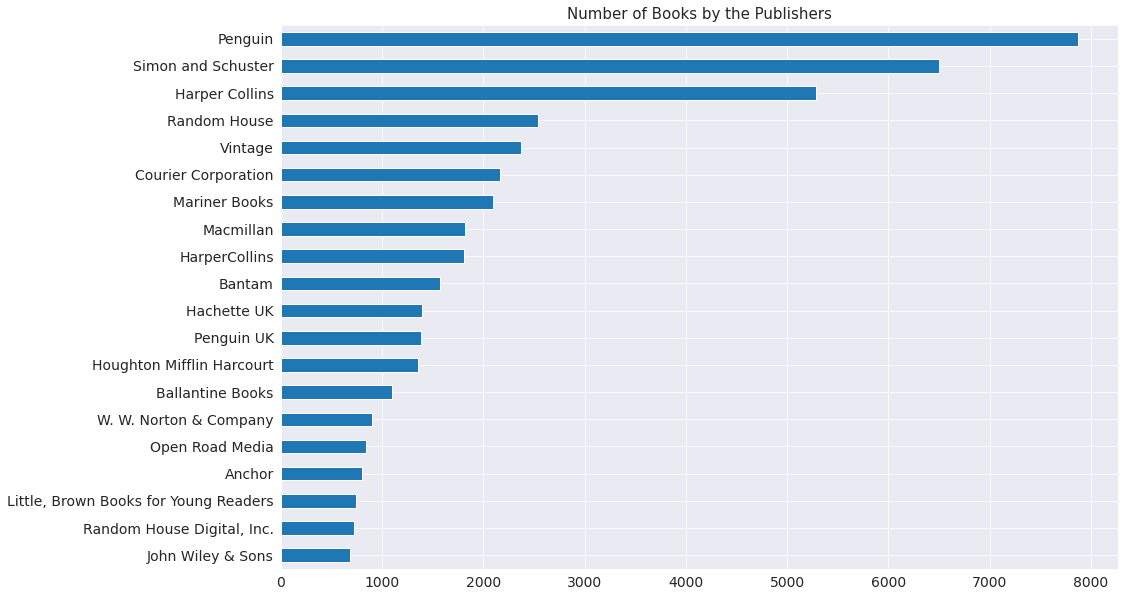

In [ ]:
books['publisher'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(15,10))
plt.title('Number of Books by the Publishers', fontsize = 15)
plt.grid(visible=True, which='both')
plt.show()

#### Polars

In [ ]:
pl3 = pl_book.groupby("publisher").agg([pl.count("authors").alias("count")]).sort('count',reverse=True).head(20)

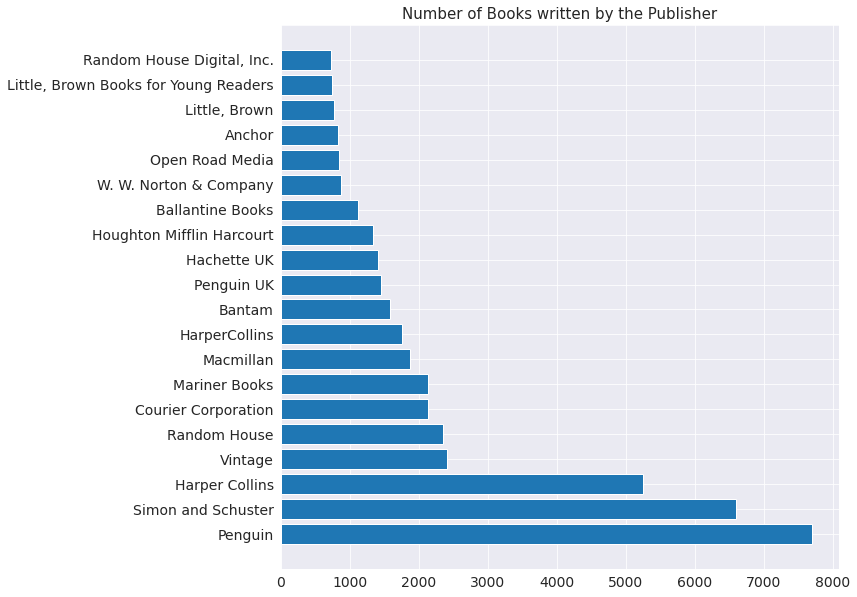

In [ ]:
plt.barh(pl3['publisher'], pl3['count'])
plt.title('Number of Books written by the Publisher', fontsize = 15)
plt.grid(visible=True, which='both')
plt.show()

#### Koalas

In [ ]:
ks_book['publisher'].value_counts().head(20).plot.barh()

> According to the bar charts that have been analysed by using 3 libraries, the publisher that published the most amount of books is **Penguin** and the second highest is **Simon and Schuster** followed by Harper Collins, Random House, Courier Corporation and other publishers.

### **Question 4 : What are the most frequent words used in review for positive rated(rating>3.0) books?**

#### Pandas

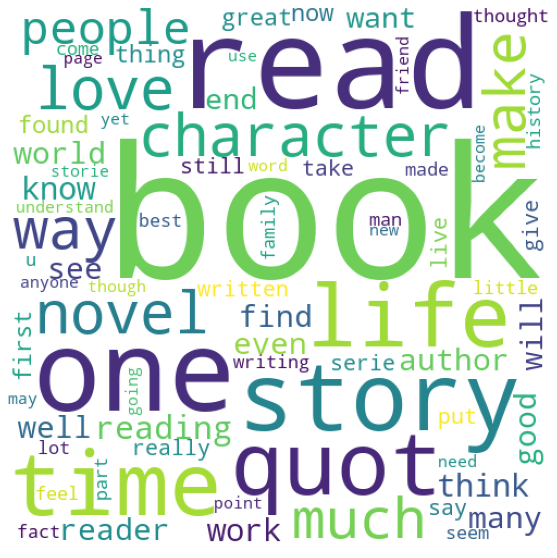

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(books[books['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

#### Koalas

In [ ]:
from wordcloud import WordCloud

In [ ]:
words_df = ks_book.to_pandas()

In [ ]:
words_df['review/score'] = pd.to_numeric(words_df['review/score'], errors='coerce')

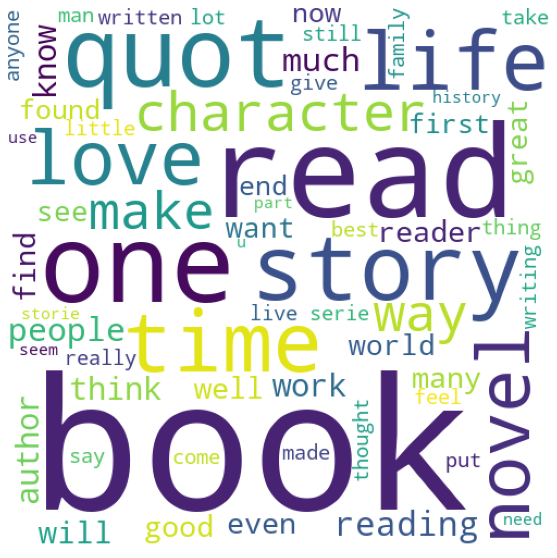

In [ ]:
wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(words_df[words_df['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_wc)

> According to the figures that have been analysed by using 2 libraries, the most frequent words used in review for positive rated(rating>3.0) books is **"book"**.

### **Question 5: What are the top rated books with the most reviews on Amazon?**

#### Pandas

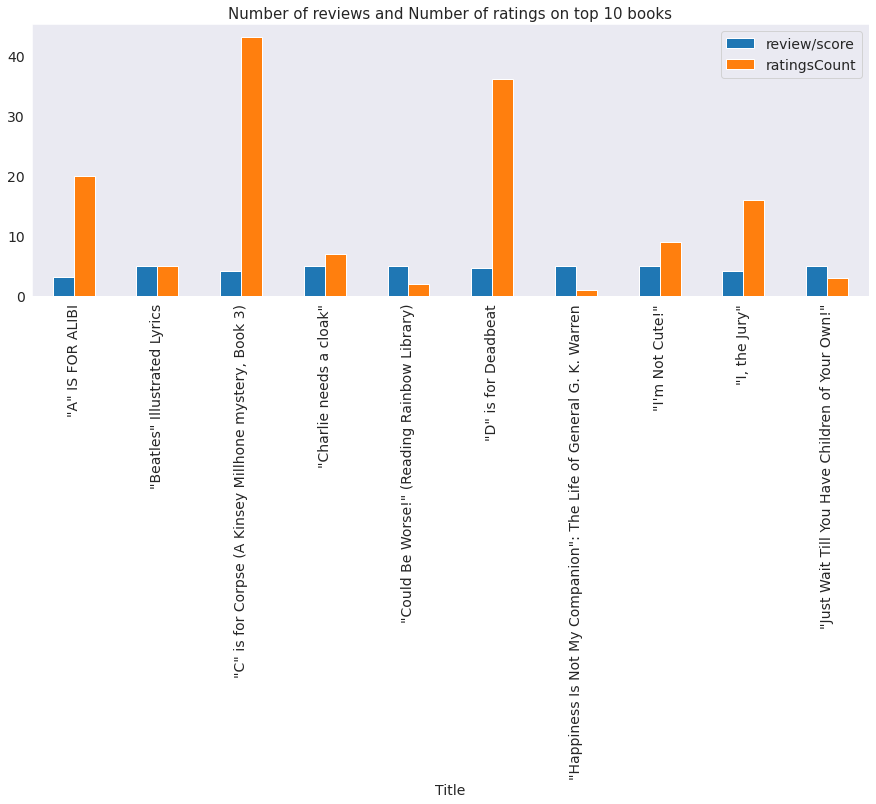

In [ ]:
books.groupby('Title').mean()[['review/score', 'ratingsCount']].head(10).plot(kind='bar', figsize=(15,5))
plt.title('Number of reviews and Number of ratings on top 10 books', fontsize = 15)
plt.grid()
plt.show()

#### Polars

In [ ]:
pl4 = pl_book.groupby("Title").agg([pl.mean("review/score").alias("review/score"),
                                    pl.mean("ratingsCount").alias("ratingsCount")]).sort(['Title']).head(10)

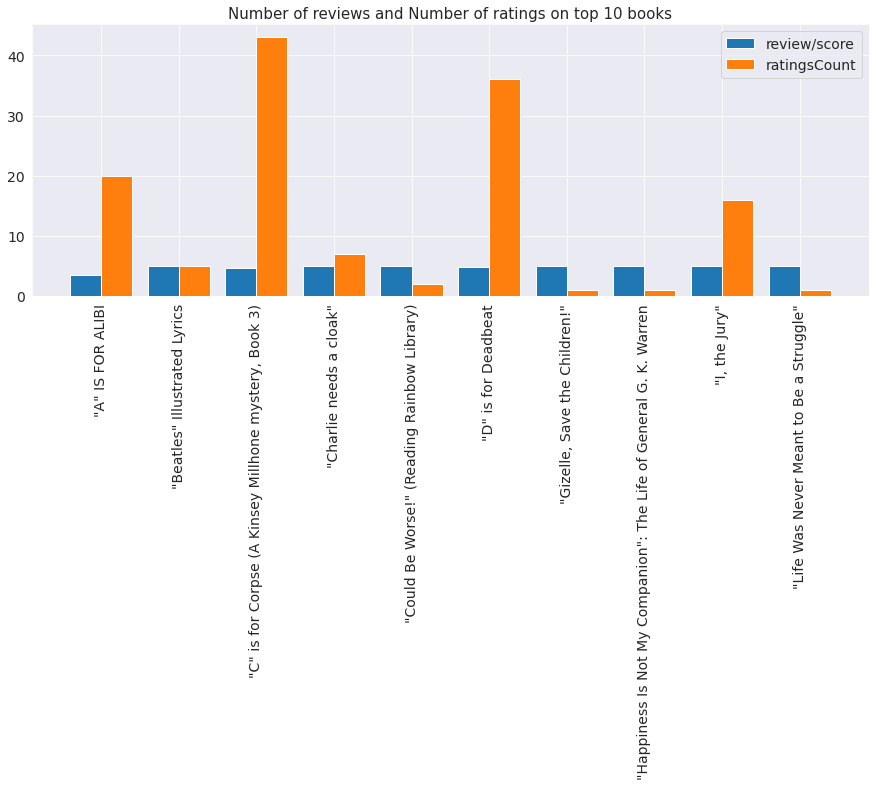

In [ ]:
X_axis = np.arange(len(pl4['Title']))
plt.figure(figsize=(15,5))  
plt.bar(X_axis - 0.2, pl4['review/score'], 0.4, label = 'review/score')
plt.bar(X_axis + 0.2, pl4['ratingsCount'], 0.4, label = 'ratingsCount')
  
plt.xticks(X_axis, pl4['Title'])
plt.xticks(rotation = 90)
plt.title('Number of reviews and Number of ratings on top 10 books', fontsize = 15)
plt.legend()
plt.show()

#### Koalas

In [ ]:
ks_book_q5 = ks_book[['Title','review/score','ratingsCount']]

In [ ]:
ks_book_q5['review/score'] = ks_book_q5['review/score'].astype(float)
ks_book_q5['ratingsCount'] = ks_book_q5['ratingsCount'].astype(float)

In [ ]:
ks_book_q5.dtypes

Title            object
review/score    float64
ratingsCount    float64
dtype: object

In [ ]:
ks_book_q5.groupby('Title').mean().head(10).plot.bar()

# Pandas vs Polars vs Koalas

- Perhaps the major difference of Polars from Pandas and Koalas is that **Polars does not have an index**. Polars also allow creating or assigning multiple columns in one statement using `with_columns` method.

- Pandas and Koalas use the same function since Koalas implements the Pandas API on top of Apache Spark. Whereas, Polars has some common function and similar function but different name.

- In term of visualization, Pandas dataframe has a `plot()` method which return a **matplotlib** graph while Koalas `plot()` returns **plotly** graph by default. Polars on the other hand does not provide such method.

In [ ]:
index = ['Read csv','Head','Join Dataframe','Info',
           'Shape','Select Columns','Drop Duplicates','Count Null',
           'Drop Null','Sample']
pandas_col = [38.4, 1.72e-03, 2.68, 21.3e-03, 33.9e-06, 1.4, 11.6, 1.92, 2.4, 171e-03]
polars_col = [12.5, 3.31e-03, 6.93, 13.4e-03, 19.1e-06, 35.8e-03, 4.28, 212e-06, 1.65, 307e-03]
koalas_col = [52.8, 393e-03, 1.08, 135, 25.3, 456e-03, 535e-03, 65, 1.24, 320e-3]

walltime = pd.DataFrame({'Pandas':pandas_col, 'Polars':polars_col, 'Koalas':koalas_col}, index = index)
walltime

,Pandas,Polars,Koalas
Read csv,38.400000,12.500000,52.800
Head,0.001720,0.003310,0.393
Join Dataframe,2.680000,6.930000,1.080
Info,0.021300,0.013400,135.000
Shape,0.000034,0.000019,25.300
Select Columns,1.400000,0.035800,0.456
Drop Duplicates,11.600000,4.280000,0.535
Count Null,1.920000,0.000212,65.000
Drop Null,2.400000,1.650000,1.240
Sample,0.171000,0.307000,0.320


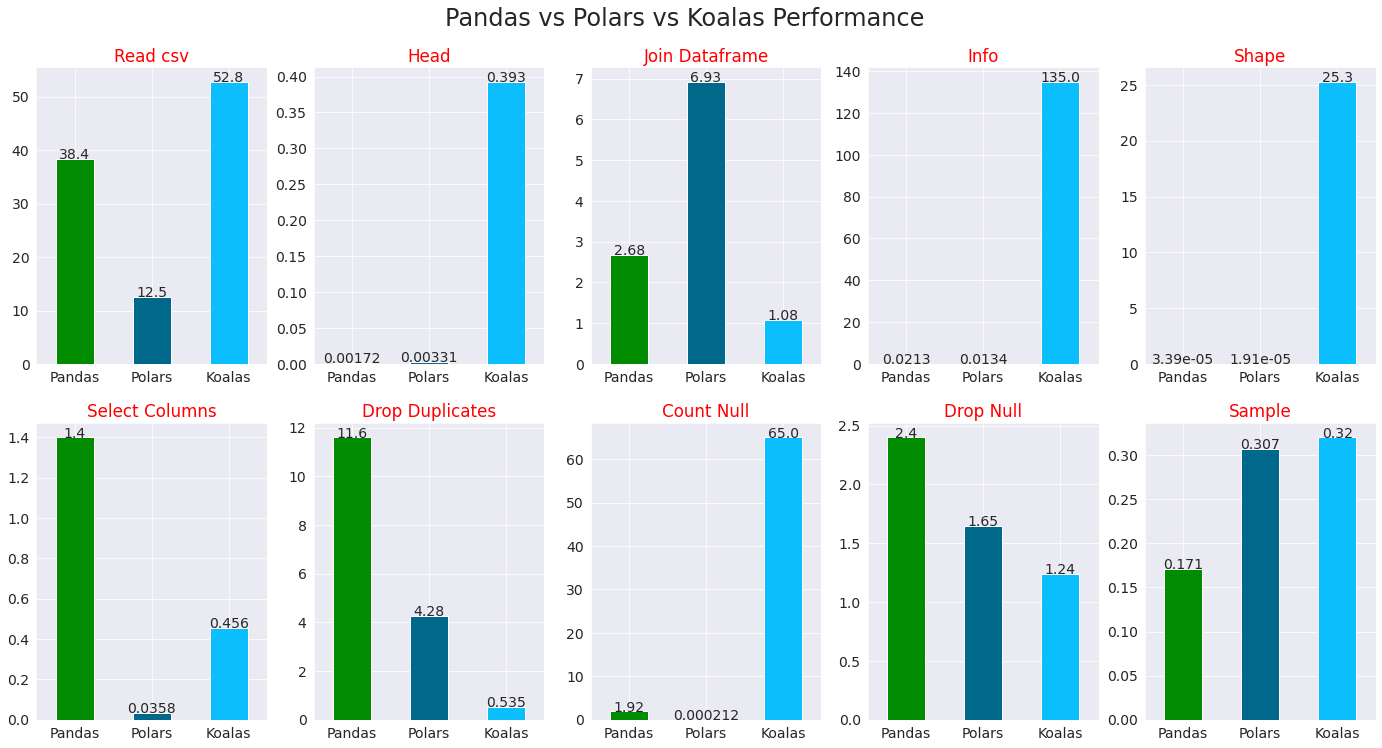

In [ ]:
plt.figure(figsize=(24,12))
plt.suptitle('Pandas vs Polars vs Koalas Performance', fontsize=24, y=0.95)
for test, i in zip(walltime.index,range(len(walltime.index))):
  plt.subplot(2,5,i+1)
  fig = walltime.loc[test].plot(kind='bar', color=['#008b00', '#00688b', '#0bbfff'])
  plt.title(test, color='r')
  plt.xticks(rotation=0)
  for j in range(len(walltime.loc[test])):
    plt.text(j, walltime.loc[test][j], walltime.loc[test][j], ha='center')

The graph above show the time taken in seconds for the three libraries to run the functions. From the graph, it can be seen that:

- **Pandas** is the fastest in **head** and **sample** while it is the slowest in selecting columns, dropping duplicates and dropping nulls.

- **Polars** is the fastest in **read csv, info, shape, select columns** and **count null** but relatively slower in joining dataframe.

- **Koalas** is the fastest in **joining dataframe, dropping duplicates** and **dropping nulls** but extremely slow in head, info, shape and count nulls compared to Pandas and Polars.

# Inferences & Conclusion

> From all the books from Amazon that have been reviewed, we can conclude that **Fiction** category has the highest amount of books followed by **Juvenile Fiction**. Meanwhile for publishers, the publisher that published the most amount of books is **Penguin** followed by **Simon and Schuster**. Other than that we discover that the authors that has written the highest amount of books is **J.R.R. Tolkien** followed by **Jane Austen** and from this we also find out  the most frequent words used in review for positive rated(rating>3.0) books is **"book"**.

> Throughout this case study project where we investigate which library is the most effiecient among the 3 libraries, Pandas, Polars and Koalas, **Polars** turns out to be the library that has the highest efficiency compared to other 2 libraries. 





# References & Future Work


Koalas Documentation : https://koalas.readthedocs.io/en/latest/reference/io.html

[Polars - User Guide](https://pola-rs.github.io/polars-book/user-guide/)

[Polars API reference](https://pandas.pydata.org/docs/reference/index.html)